In [25]:
#### 0.그래프 그리는 데 필요한 설정

#기본 모듈
from matplotlib import pyplot as plt #for plot
import numpy as np
import pandas as pd

#데이터분석하고 연산하는 데 필요한 것들
from scipy.optimize import curve_fit, leastsq  #→ 최적화 피팅
#from tqdm import tqdm
from scipy.stats import norm
from scipy.stats import gaussian_kde 
import scipy as sc 
import math as math 

#그래프 폰트 크기 공통으로 설정
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 10
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


[52.52543193539678, 48.50933930698294, 37.4729902729953, 31.458338163355037, 31.233816449483086, 37.220008060181826, 49.42639982843177, 34.46882649583534, 10.704309879669964, 2.630698785494075, 1.9103319345077179, 7.314348227969462, 2.7584548029648777, 3.6366193091936365, 3.367825708079324, 3.984469851812158]


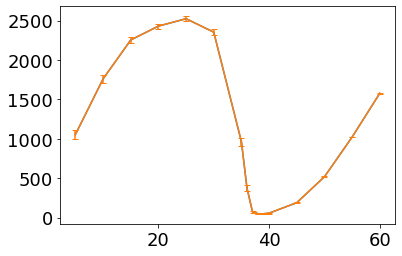

<Figure size 4000x2000 with 0 Axes>

In [26]:
#### 1. 2D XY Plot with errrorbar 

#Example
x = [5,10,15,20,25,   30,35,36,37,38,   39,40,45,50,55,   60]
y = [1054, 1760, 2254, 2430, 2524,   2353, 961.5, 374.6, 72.43, 48.22,    47.52, 55.11, 188.4, 517.3, 1021,   1577]
std = [1661, 1534, 1185, 994.8, 987.7,    1177, 1563, 1090, 338.5, 83.19,    60.41, 231.3, 87.23, 115, 106.5,  126]
Number_of_event = 1000
Number_of_bin = 16
Stat_error = [] 

for i in range(Number_of_bin):
    Stat_error.append(std[i]/pow(1000,0.5)) 

print(Stat_error)

plt.plot(x,y)
plt.errorbar(x,y,yerr=Stat_error,capsize=3)
plt.figure(figsize=(50, 25), dpi= 80, facecolor='w', edgecolor='k')
plt.show() 

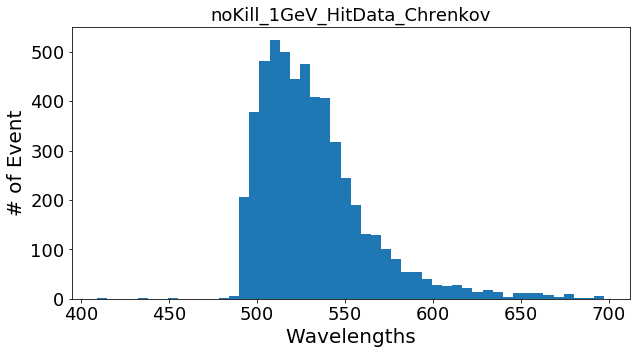

(array([  1,   0,   0,   0,   1,   0,   0,   1,   0,   0,   0,   0,   1,
          5, 207, 378, 482, 524, 499, 445, 476, 408, 406, 318, 244, 189,
        132, 129, 101,  80,  54,  54,  41,  28,  26,  28,  22,  13,  18,
         14,   4,  12,  12,  11,   8,   4,  10,   1,   1,   5]),
 array([409.025  , 414.78924, 420.55348, 426.31772, 432.08196, 437.8462 ,
        443.61044, 449.37468, 455.13892, 460.90316, 466.6674 , 472.43164,
        478.19588, 483.96012, 489.72436, 495.4886 , 501.25284, 507.01708,
        512.78132, 518.54556, 524.3098 , 530.07404, 535.83828, 541.60252,
        547.36676, 553.131  , 558.89524, 564.65948, 570.42372, 576.18796,
        581.9522 , 587.71644, 593.48068, 599.24492, 605.00916, 610.7734 ,
        616.53764, 622.30188, 628.06612, 633.83036, 639.5946 , 645.35884,
        651.12308, 656.88732, 662.65156, 668.4158 , 674.18004, 679.94428,
        685.70852, 691.47276, 697.237  ]))

In [27]:
#### 2. 1D Histogram with data extract from histogrm

def plotHist(filename, bin_num = 50):
    dataframe = pd.read_csv(filename)
    data = np.array(dataframe)
    
    counts, bins = np.histogram(data, bins = bin_num)
    
    plt.figure(figsize = (10,5))
    plt.hist(data, bins = bin_num)
    plt.title(filename[:-4])
    plt.xlabel("Wavelengths")
    plt.ylabel("# of Event")
    plt.show()
    
    return(counts, bins)

#Example
filename = 'noKill_1GeV_HitData_Chrenkov.txt'
plotHist(filename)


[ -1   0   2   1   2   0   1   2  -1   1   1   0  -1   0   0   0   0   2
   1   0   0   0   0   2  -1   0   2  -1   4   8 168 138 228 281 319 400
 417 311 297 445 222 334 307 390 316 275 327 194 208 232 184 161 202 109
 113  90 109  53  87  43  51  44  70  19  15  62  19  51 -12  46  42  17
  26  22  -9   4  -5   3  -7  10  -3  26  16   1   0   9  13   5   9   1
   9   6  14   3   2   3   4   6   2   1]
counts_3 [  0   0   2   1   2   0   1   2   0   1   1   0   0   0   0   0   0   2
   1   0   0   0   0   2   0   0   2   0   4   8 168 138 228 281 319 400
 417 311 297 445 222 334 307 390 316 275 327 194 208 232 184 161 202 109
 113  90 109  53  87  43  51  44  70  19  15  62  19  51   0  46  42  17
  26  22   0   4   0   3   0  10   0  26  16   1   0   9  13   5   9   1
   9   6  14   3   2   3   4   6   2   1] 100


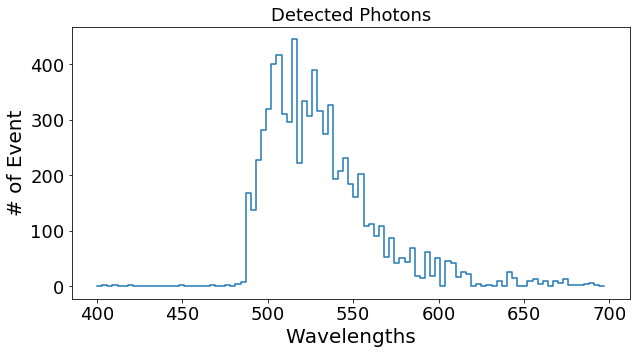

([0,
  0,
  2,
  1,
  2,
  0,
  1,
  2,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  1,
  0,
  0,
  0,
  0,
  2,
  0,
  0,
  2,
  0,
  4,
  8,
  168,
  138,
  228,
  281,
  319,
  400,
  417,
  311,
  297,
  445,
  222,
  334,
  307,
  390,
  316,
  275,
  327,
  194,
  208,
  232,
  184,
  161,
  202,
  109,
  113,
  90,
  109,
  53,
  87,
  43,
  51,
  44,
  70,
  19,
  15,
  62,
  19,
  51,
  0,
  46,
  42,
  17,
  26,
  22,
  0,
  4,
  0,
  3,
  0,
  10,
  0,
  26,
  16,
  1,
  0,
  9,
  13,
  5,
  9,
  1,
  9,
  6,
  14,
  3,
  2,
  3,
  4,
  6,
  2,
  1],
 [400,
  403,
  406,
  409,
  412,
  415,
  418,
  421,
  424,
  427,
  430,
  433,
  436,
  439,
  442,
  445,
  448,
  451,
  454,
  457,
  460,
  463,
  466,
  469,
  472,
  475,
  478,
  481,
  484,
  487,
  490,
  493,
  496,
  499,
  502,
  505,
  508,
  511,
  514,
  517,
  520,
  523,
  526,
  529,
  532,
  535,
  538,
  541,
  544,
  547,
  550,
  553,
  556,
  559,
  562,
  565,
  568,
  571,
  574,
  577,
  580

In [29]:
#### 3. ( 1D Histogram - 1D Histogram ) -> Step plot

def plotHist_Difference(filename_1, filename_2, bin_num = 100):
    dataframe_1 = pd.read_csv(filename_1)
    data_1 = np.array(dataframe_1)
    counts_1, bins_1 = np.histogram(data_1, bins = bin_num)
    
    dataframe_2 = pd.read_csv(filename_2)
    data_2 = np.array(dataframe_2)
    counts_2, bins_2 = np.histogram(data_2, bins = bin_num)

    counts_3 = np.array(counts_1-counts_2)
    
    # Negative -> 0
    print(counts_3)
    for i in range(len(counts_3)):
        if counts_3[i]<0:
            counts_3[i]=0
    print('counts_3',counts_3, len(counts_3))
    
    #array->list, align bin #
    counts_3_list = counts_3.tolist()
    bins_1_list = bins_1.tolist()
    bins_1_list.pop(len(bins_1_list)-1)
    
    #step plot
    plt.figure(figsize = (10,5))
    plt.step(bins_1_list,counts_3_list)
    plt.title("Detected Photons")
    plt.xlabel("Wavelengths")
    plt.ylabel("# of Event")
    plt.show()
    
    return (counts_3_list, bins_1_list)
    
#Example
filename1 = 'noKill_1GeV_HitData_Scintillation.txt'
filename2 = 'Kill_1GeV_HitData_Scintillation.txt'
bin_num = range(400,703,3) # (703-400)/3-1 = 100 bins
plotHist_Difference(filename1, filename2, bin_num)

In [30]:
# 4. midBin[i] = (bins[i-1] + bins[i])/2

def midBins(bins):
    midBins = []
    for i in range(1, len(bins)):
        mid = (bins[i-1] + bins[i])/2
        midBins.append(mid)
    return midBins

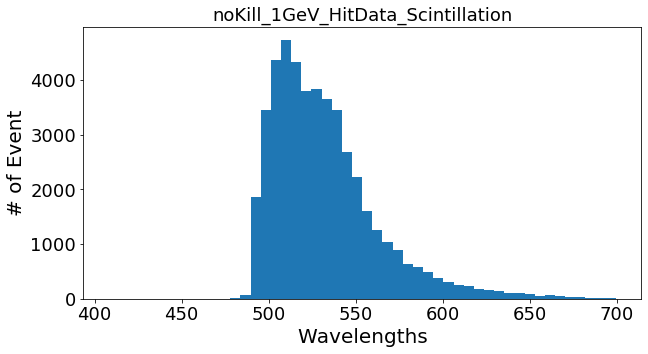

[   3    5    3    2    1    0    0    3    0    1    2    3    6   66
 1857 3449 4362 4734 4330 3794 3830 3648 3451 2688 2227 1606 1252 1032
  900  642  574  498  373  314  251  241  187  164  137   97  114   81
   58   72   43   39   36   19   19   22] [408.02    413.84842 419.67684 425.50526 431.33368 437.1621  442.99052
 448.81894 454.64736 460.47578 466.3042  472.13262 477.96104 483.78946
 489.61788 495.4463  501.27472 507.10314 512.93156 518.75998 524.5884
 530.41682 536.24524 542.07366 547.90208 553.7305  559.55892 565.38734
 571.21576 577.04418 582.8726  588.70102 594.52944 600.35786 606.18628
 612.0147  617.84312 623.67154 629.49996 635.32838 641.1568  646.98522
 652.81364 658.64206 664.47048 670.2989  676.12732 681.95574 687.78416
 693.61258 699.441  ]
[ -1   0   2   1   2   0   1   2  -1   1   1   0  -1   0   0   0   0   2
   1   0   0   0   0   2  -1   0   2  -1   4   8 168 138 228 281 319 400
 417 311 297 445 222 334 307 390 316 275 327 194 208 232 184 161 202 109
 113  90

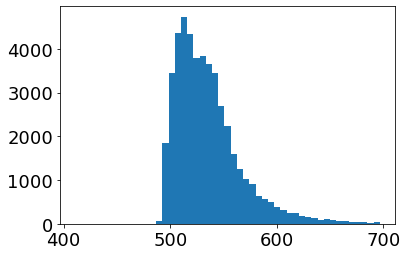

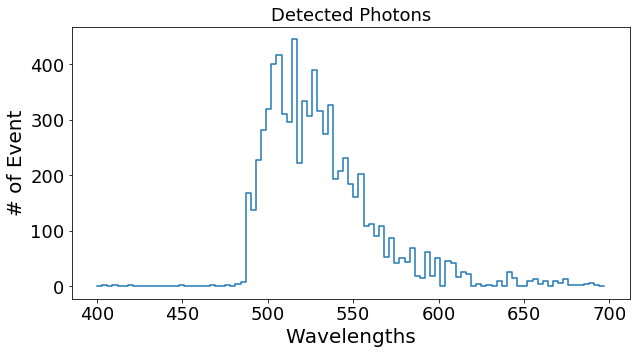

[0, 0, 2, 1, 2, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 4, 8, 168, 138, 228, 281, 319, 400, 417, 311, 297, 445, 222, 334, 307, 390, 316, 275, 327, 194, 208, 232, 184, 161, 202, 109, 113, 90, 109, 53, 87, 43, 51, 44, 70, 19, 15, 62, 19, 51, 0, 46, 42, 17, 26, 22, 0, 4, 0, 3, 0, 10, 0, 26, 16, 1, 0, 9, 13, 5, 9, 1, 9, 6, 14, 3, 2, 3, 4, 6, 2, 1] [400, 403, 406, 409, 412, 415, 418, 421, 424, 427, 430, 433, 436, 439, 442, 445, 448, 451, 454, 457, 460, 463, 466, 469, 472, 475, 478, 481, 484, 487, 490, 493, 496, 499, 502, 505, 508, 511, 514, 517, 520, 523, 526, 529, 532, 535, 538, 541, 544, 547, 550, 553, 556, 559, 562, 565, 568, 571, 574, 577, 580, 583, 586, 589, 592, 595, 598, 601, 604, 607, 610, 613, 616, 619, 622, 625, 628, 631, 634, 637, 640, 643, 646, 649, 652, 655, 658, 661, 664, 667, 670, 673, 676, 679, 682, 685, 688, 691, 694, 697]


TypeError: cannot unpack non-iterable NoneType object

In [32]:
# 5. Count data extract from histogrm (2D possible) -> raw data for histogram ** something wrong

def Counts_to_Hist(counts, bins):
    print(counts, bins)
    tot_counts = 0
    hist_list = [] #new list with all the numbers repeated
    newBins = midBins(bins) #values of midpoints of bins
    
    #checking so code doesnt run an error 
    if len(counts) != len(newBins): 
        return 
    
    
    #populating the new hist_list
    for i in range(len(counts)):
        times = counts[i] #how many times a certain value will be added to the list 
        value = newBins[i] #what value is going to be added to the list 
        tot_counts += times #keeping track to check at the end if we have all the counts recorded
        
        if times != 0: #if it has a non zero occurance
            for i in range(times): #loop to add as many times as necessary to the new list 
                hist_list.append(value)
       
    #checking to make sure we have all the counts recorded before returning the list
    if len(hist_list) == tot_counts: 
        return (hist_list, newBins)

#Example1
filename = 'noKill_1GeV_HitData_Scintillation.txt'
counts, bins = plotHist(filename)  
hist_list, newBins = Counts_to_Hist(counts, bins)    
plt.hist(hist_list, newBins) 

#Example2
filename1 = 'noKill_1GeV_HitData_Scintillation.txt'
filename2 = 'Kill_1GeV_HitData_Scintillation.txt'
bin_num = range(400,703,3) # (703-400)/3-1 = 100 bins
counts, bins = plotHist_Difference(filename1, filename2, bin_num)
hist_list, newBins = Counts_to_Hist(counts, bins)    
plt.hist(hist_list, newBins)

0eV


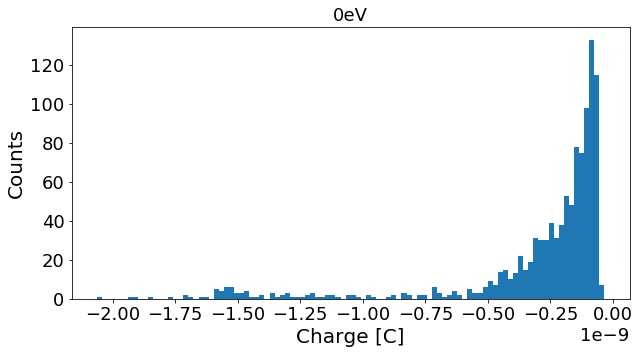

0.3eV


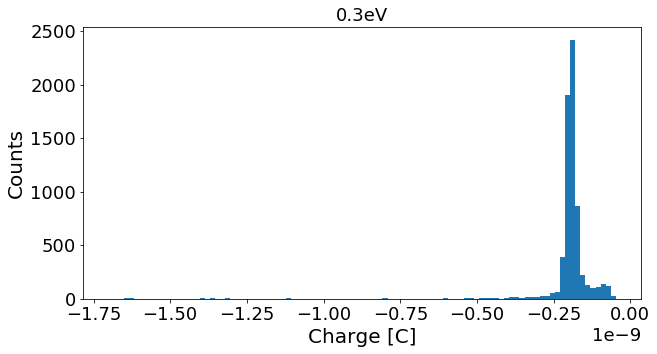

0.6eV


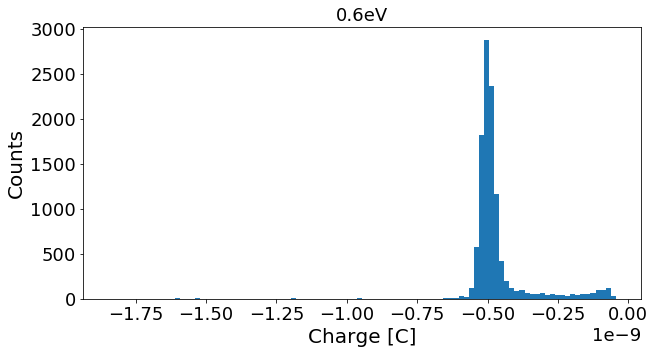

0.9eV


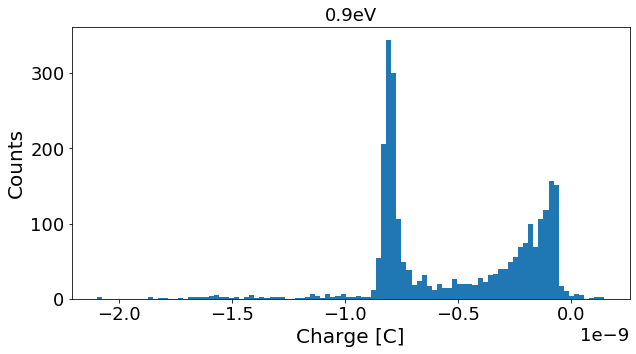

In [33]:
# 6. Direct E-Gun Data
#this is a function for the. Data comes from teh oscilliscope in Vs and this function converts to C by deviding by 50 Ohms 

ohms = 50
def VStoC(VS_data):
    C_data = [] #list of coloumb values
    for i in VS_data:
        C_data.append(i/ohms) #VS/ohm
    return C_data

#plotting a histogram quickly from the .csv file
def plotHistFromCsv(filename, bin_num = 100):
    dataframe = pd.read_csv(filename) #creates a dataframe of the csv
    data = np.array(dataframe["Area"]) #gets the coloumn of interest
    newData = VStoC(data) #convert data from Vs --> C
    plt.figure(figsize = (10,5)) #the size of the figure
    plt.hist(newData, bins = bin_num) #plotting the hsitogram from the list of values
    plt.title(filename[:-4]) #the titles is the name of the file
    plt.xlabel("Charge [C]")
    plt.ylabel("Counts")
    plt.show()

files = ['0eV.csv', '0.3eV.csv', '0.6eV.csv', '0.9eV.csv']

for filename in files:
    print(filename[:-4])
    df = pd.read_csv(filename) #creates a dataframe of the csv
    plotHistFromCsv(filename, 100)


0.3eV
[  2   0   0   0   0   0   0   0   0   0   2   0   1   1   0   0   1   0
   2   3   3   3   4   5   3   2   1   3   0   2   5   1   3   1   3   2
   3   0   0   1   1   2   6   4   1   6   2   4   7   3   3   4   2   2
  12  54 206 344 300 106  49  38  18  23  31  17  12  20  14  14  26  20
  20  20  18  28  22  32  33  39  39  49  56  69  74 100  69 106 118 157
 151  17  10   4   6   5   0   1   2   2] [-2.09554000e-09 -2.07310911e-09 -2.05067822e-09 -2.02824732e-09
 -2.00581643e-09 -1.98338554e-09 -1.96095465e-09 -1.93852376e-09
 -1.91609286e-09 -1.89366197e-09 -1.87123108e-09 -1.84880019e-09
 -1.82636930e-09 -1.80393840e-09 -1.78150751e-09 -1.75907662e-09
 -1.73664573e-09 -1.71421484e-09 -1.69178394e-09 -1.66935305e-09
 -1.64692216e-09 -1.62449127e-09 -1.60206038e-09 -1.57962948e-09
 -1.55719859e-09 -1.53476770e-09 -1.51233681e-09 -1.48990592e-09
 -1.46747502e-09 -1.44504413e-09 -1.42261324e-09 -1.40018235e-09
 -1.37775146e-09 -1.35532056e-09 -1.33288967e-09 -1.31045878e-09
 -

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


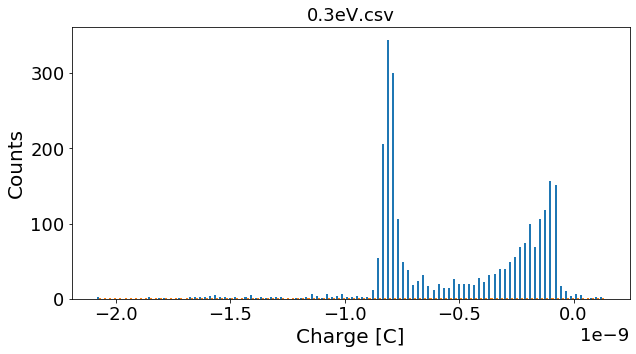

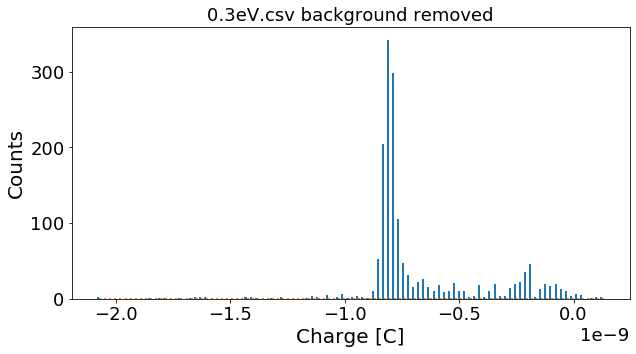

0.6eV
[  2   0   0   0   0   0   0   0   0   0   2   0   1   1   0   0   1   0
   2   3   3   3   4   5   3   2   1   3   0   2   5   1   3   1   3   2
   3   0   0   1   1   2   6   4   1   6   2   4   7   3   3   4   2   2
  12  54 206 344 300 106  49  38  18  23  31  17  12  20  14  14  26  20
  20  20  18  28  22  32  33  39  39  49  56  69  74 100  69 106 118 157
 151  17  10   4   6   5   0   1   2   2] [-2.09554000e-09 -2.07310911e-09 -2.05067822e-09 -2.02824732e-09
 -2.00581643e-09 -1.98338554e-09 -1.96095465e-09 -1.93852376e-09
 -1.91609286e-09 -1.89366197e-09 -1.87123108e-09 -1.84880019e-09
 -1.82636930e-09 -1.80393840e-09 -1.78150751e-09 -1.75907662e-09
 -1.73664573e-09 -1.71421484e-09 -1.69178394e-09 -1.66935305e-09
 -1.64692216e-09 -1.62449127e-09 -1.60206038e-09 -1.57962948e-09
 -1.55719859e-09 -1.53476770e-09 -1.51233681e-09 -1.48990592e-09
 -1.46747502e-09 -1.44504413e-09 -1.42261324e-09 -1.40018235e-09
 -1.37775146e-09 -1.35532056e-09 -1.33288967e-09 -1.31045878e-09
 -

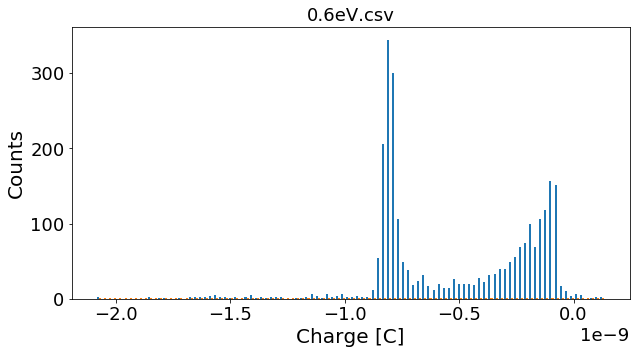

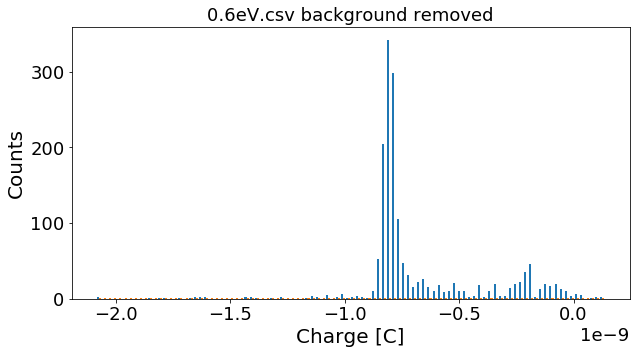

0.9eV
[  2   0   0   0   0   0   0   0   0   0   2   0   1   1   0   0   1   0
   2   3   3   3   4   5   3   2   1   3   0   2   5   1   3   1   3   2
   3   0   0   1   1   2   6   4   1   6   2   4   7   3   3   4   2   2
  12  54 206 344 300 106  49  38  18  23  31  17  12  20  14  14  26  20
  20  20  18  28  22  32  33  39  39  49  56  69  74 100  69 106 118 157
 151  17  10   4   6   5   0   1   2   2] [-2.09554000e-09 -2.07310911e-09 -2.05067822e-09 -2.02824732e-09
 -2.00581643e-09 -1.98338554e-09 -1.96095465e-09 -1.93852376e-09
 -1.91609286e-09 -1.89366197e-09 -1.87123108e-09 -1.84880019e-09
 -1.82636930e-09 -1.80393840e-09 -1.78150751e-09 -1.75907662e-09
 -1.73664573e-09 -1.71421484e-09 -1.69178394e-09 -1.66935305e-09
 -1.64692216e-09 -1.62449127e-09 -1.60206038e-09 -1.57962948e-09
 -1.55719859e-09 -1.53476770e-09 -1.51233681e-09 -1.48990592e-09
 -1.46747502e-09 -1.44504413e-09 -1.42261324e-09 -1.40018235e-09
 -1.37775146e-09 -1.35532056e-09 -1.33288967e-09 -1.31045878e-09
 -

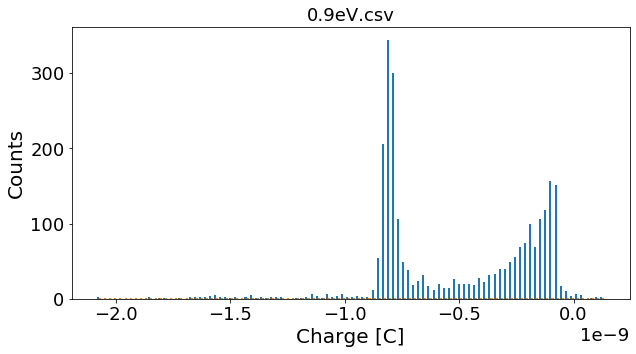

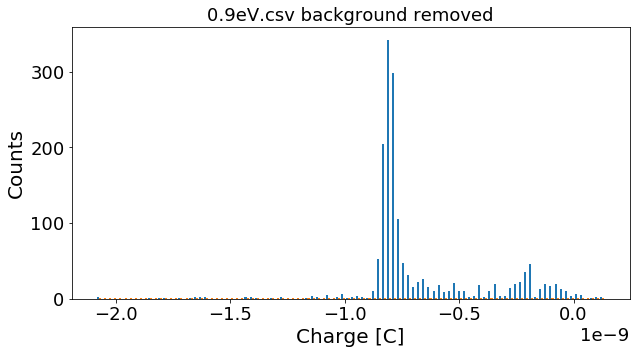

NameError: name 'histData' is not defined

<Figure size 432x288 with 0 Axes>

<Figure size 1008x576 with 0 Axes>

In [34]:
# 7. eV-0eV Background Removed Histogram **something wrong

def plotHist(data, filename, bin_num = 50): #name is for the title of the graph
    plt.figure(figsize = (10,5))
    plt.hist(data, bins = bin_num) 
    plt.title(filename)
    plt.xlabel("Charge [C]")
    plt.ylabel("Counts")
    plt.show()
    
files = ['0.3eV.csv', '0.6eV.csv', '0.9eV.csv']
dataframe_0eV = pd.read_csv('0eV.csv') #creates a dataframe of the csv
data_0eV = np.array(dataframe_0eV["Area"])
C_data_0eV = VStoC(data_0eV)

for filename in files:
    print(filename[:-4])
    dataframe = pd.read_csv(filename) #creates a dataframe of the csv
    data = np.array(df["Area"])
    C_data = VStoC(data)
    
    #find minimum bin
    min_eV = min(C_data)
    min_0eV = min(C_data_0eV)
    if min_eV <= min_0eV:
        minimum = min_eV
    else:
        minimum = min_0eV
    #find maximum bin
    max_eV = max(C_data)
    max_0eV = max(C_data_0eV)
    if max_eV >= max_0eV:
        maximum = max_eV
    else:
        maximum = max_0eV
    
    #Counts list is build with fixed min and max values
    bin_num = 100
    Counts, bins = np.histogram(C_data,range=(minimum,maximum), bins=bin_num)
    Counts_0eV, bins_0eV = np.histogram(C_data_0eV,range=(minimum,maximum), bins=bin_num)
    difference = Counts - Counts_0eV
    Counts_difference = []
    
    for i in difference:
        if i >=0:
            Counts_difference.append(i)
        else:
            Counts_difference.append(0)

    #Counts list to Hist list
    Hist_data = Counts_to_Hist(Counts, bins)
    Hist_data_difference = Counts_to_Hist(Counts_difference, bins)
    
    
    plotHist(Hist_data, filename, bin_num)
    plotHist(Hist_data_difference, filename + " background removed", bin_num)
    
plt.clf()
plt.figure(figsize = (14,8))
for i in range(0,9):
    num = 1700 + 50*i
    filename = str(num) + "v-a.csv"   
    tr_data = histData(filename, tot_low, tot_up)
    plt.hist(tr_data, bins = 100, label = num , alpha = 0.4) #alpha- transperency, range - range of the graph 
    
plt.title("All voltages")
plt.xlabel("Charge [C]")
plt.ylabel("Counts")
plt.legend()
plt.show()


In [ ]:
#8. hist data -> truncated hist data

def truncated_hist_data(filename, lowlim = -10, uplim = 10):
    dataframe = pd.read_csv(filename) #creates a dataframe of the csv
    data = np.array(dataframe["Area"])
    C_data = VStoC(data) #this array can be used to fit a normal distribution
    truncated_data = [] #data with the lower limt applied, if nothing specified, all values will be taken 
    for i in C_data:
        if i >= lowlim and i <= uplim:
            truncated_data.append(i)
    return truncated_data

filename = "1700v_attenuator.csv"
truncated_hist_data(filename, -1, 0)

In [ ]:
#9. finding the Peak, FWHM, and Eenrgy Resolution

#Standard find the index of the value given in a list
def idxFind(lst, value):
    idx = -1
    for i in range(len(lst)):
        if value == lst[i]:
            idx = i
            return idx
        
#--------------------------------------------------------------------------------------------------------------------

#finding the energy resolution from the data given with the graph x limits
def Peak_FWHM_EenrgyResolution_withPlot(data, lowlim, uplim , filename, bin_num = 50):
    mean, std = norm.fit(data) #fitting the norm distribution to the data given
    x = np.linspace(lowlim, uplim, 1000) #list of nubers for x vlaues
    y = norm.pdf(x, mean, std) #applying the normal distribution to the xvalues 
    plt.figure(figsize = (10,8))
    plt.hist(data, bins = bin_num, normed = True, alpha = 0.4,color = "cornflowerblue") #plotting noramlized data
    plt.plot(x,y, c = "blue") # plot normal distribtion 
    
    #looking for the peak 
    peak = 0
    peak_x = 0
    ind = 0
    for i in range(len(x)):
        if y[i] >= peak:
            peak = y[i]
        else:
            peak = y[i-1] #this is the peak value, because function decreases after that in a norm function
            peak_x = x[i]
            ind =i-1 #the index of the peak value
            break #end the loop

    halfmax = peak/2
    x_hlf = np.linspace(lowlim, uplim, 1000) #another list of values
    y_hlf = [halfmax]*1000 #a list of 1000 values of the halfmax in order to plot a straight line throug the graph
    
    #now need to find the closest x value to the intercepts of the fitted normal fucntion data and the full width 
    #half max line
    firsthlf_dist = [] # list of the distances from the FWHM and that value for the first half of the norm fucntion
    sechlf_dist = [] # list of the distances from the FWHM and that value for the second half of the norm fucntion
    for i in range(len(y)):
        if i <= ind:
            firsthlf_dist.append(abs(y[i]-halfmax)) #appending all of the distances in order to find the minimum
        if i > ind:
            sechlf_dist.append(abs(y[i]-halfmax)) #appending all of the distances in order to find the minimum
            
    left_idx = idxFind(firsthlf_dist, min(firsthlf_dist)) #finding the idx of the minimum
    right_idx = idxFind(sechlf_dist, min(sechlf_dist))
            
    plt.title(filename)
    annot = "Peak X-value: " + "{:.2e}".format(x[ind]) #annotation for the peak xvalue to show up on the graph
    plt.annotate(annot, xy=(0.05, 0.9), xycoords='axes fraction')
    plt.xlabel("Charge [C]")
    plt.ylabel("Normalized Counts") #has to be noramlized in order to fit the function to it
    plt.show()
    
    fullwidth = abs( x[right_idx+ind]- x[left_idx]) #finding the width of the left point and the right point 
    resolution = fullwidth / peak_x #resolution = FWHM/peakXValue
    print(filename, "peak:",peak_x, "fwhm:", fullwidth, "resolution:", resolution)
    
    return abs(resolution), fullwidth, peak_x


In [35]:
#10. an hour data -> 15 mins data (background, 0eV)

def anHourt_to_15mins(filename, bin_num = 50):
    dataframe = pd.read_csv(filename) #creates a dataframe of the csv
    data = np.array(df["Area"])
    counts, bins = np.histogram(data, bins = bin_num) 
    
    norm_counts = []
    for i in counts:
        norm_counts.append(i//4)
        
    return norm_counts, bins

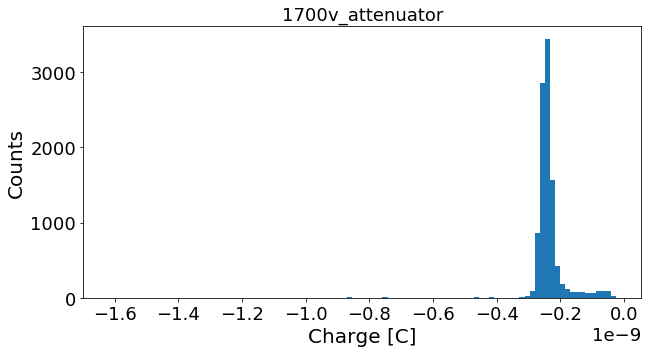

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


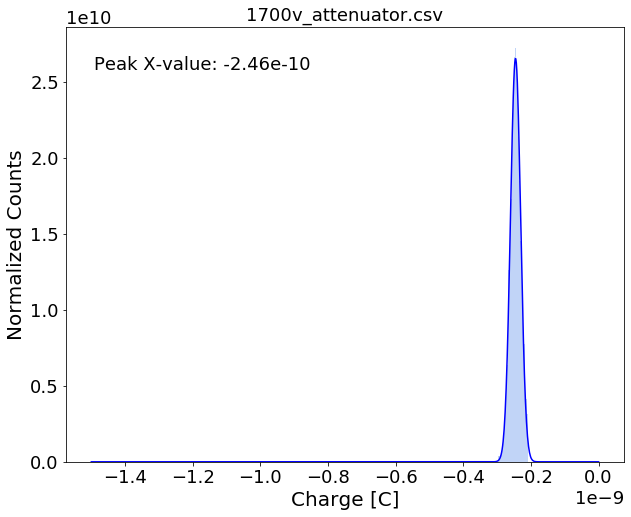

1700v_attenuator.csv peak: -2.4474474474474475e-10 fwhm: 3.303303303303297e-11 resolution: -0.13496932515337395


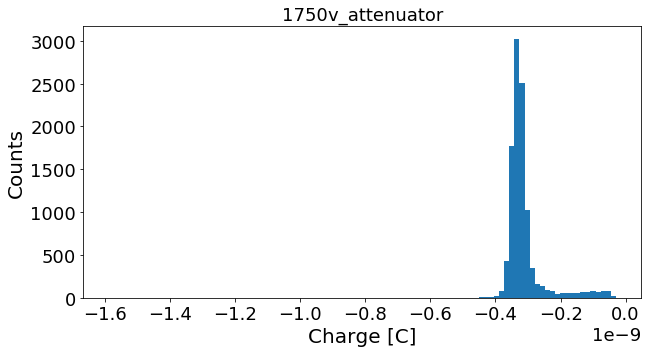

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


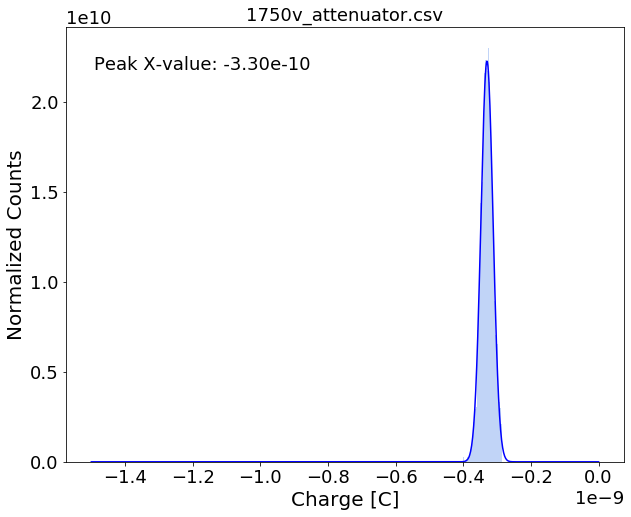

1750v_attenuator.csv peak: -3.2882882882882883e-10 fwhm: 4.054054054054048e-11 resolution: -0.12328767123287653


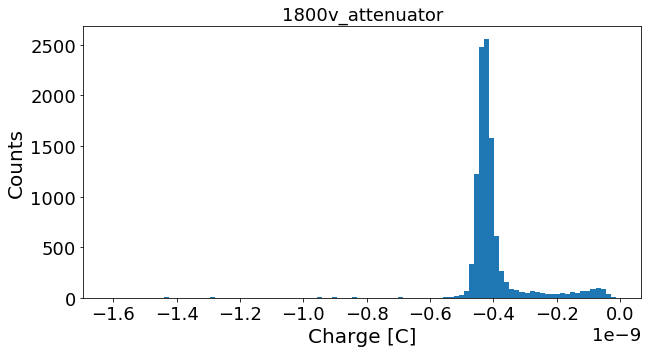

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


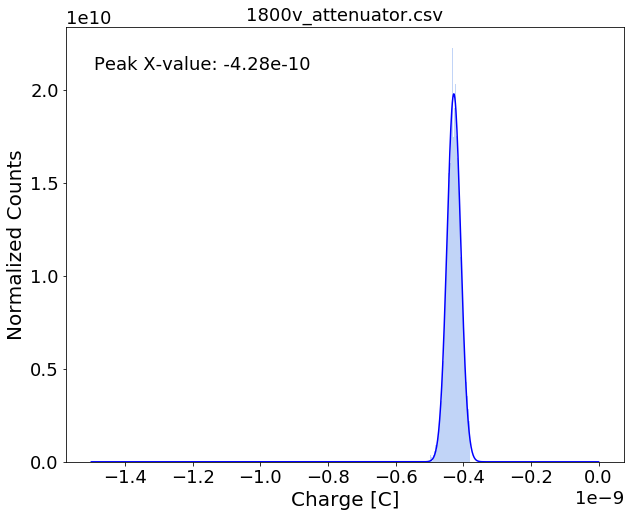

No handles with labels found to put in legend.


1800v_attenuator.csv peak: -4.264264264264265e-10 fwhm: 4.654654654654653e-11 resolution: -0.10915492957746474


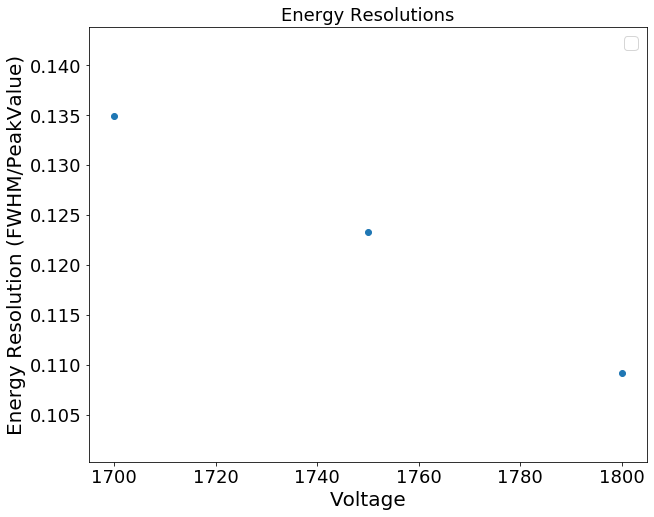

In [36]:
#11. E-Gun energy resolution for 1700-1800V

#Random cut
lowlims = [-3e-10, #1700
          -4e-10, #1750
          -5e-10] #1800
          
uplims = [-2.1e-10,#1700
         -2.85e-10, #1750
         -3.8e-10] #1800
         
resolutions_allday = []
total_low = -1.5e-9
total_up = 0
for i in range(0,3):
    number = 1700 + 50*i
    filename = str(number) + "v_attenuator.csv"
    
    #plot1: original
    plotHistFromCsv(filename, bin_num =100)

    #plot2: FWHM
    truncated_data = truncated_hist_data(filename, lowlims[i], uplims[i])
    resolution, FWHM, peak = Peak_FWHM_EenrgyResolution_withPlot(truncated_data, total_low, total_up, filename, 50)
    resolutions_allday.append(resolution)

#plot3: resolution scattering    
plt.figure(figsize = (10,8))
plt.scatter([1700, 1750, 1800], resolutions_allday)
plt.title("Energy Resolutions")
plt.xlabel("Voltage")
plt.ylabel("Energy Resolution (FWHM/PeakValue)")
plt.legend()
plt.show()

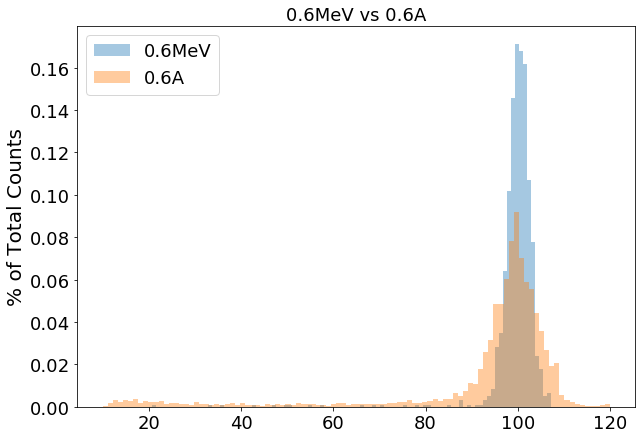

<Figure size 432x288 with 0 Axes>

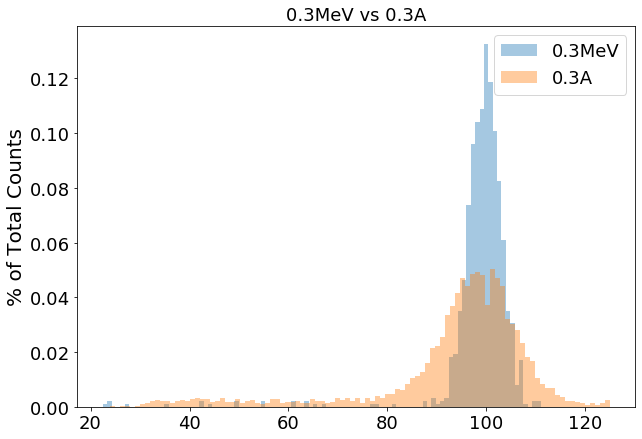

In [37]:
#12. E-Gun hist Simulation vs. Measurement 1700V (100-maximum normalized)

dataframe = pd.read_csv("Simulation_vs_Measurement_1700V.csv")
bin_num =100

plt.figure(figsize = (10,7))
plt.hist(dataframe["0.6MeV"], bins = bin_num, alpha = 0.4, label = "0.6MeV", density=True) 
plt.hist(dataframe["0.6Amp"], bins = bin_num, alpha = 0.4, label = "0.6A", density=True) 
plt.title("0.6MeV vs 0.6A")
plt.ylabel("% of Total Counts")
plt.legend()
plt.show()

plt.clf()

plt.figure(figsize = (10,7))
plt.hist(dataframe["0.3MeV"], bins = bin_num, alpha = 0.4, label = "0.3MeV", density=True)
plt.hist(dataframe["0.3Amp"], bins = bin_num, alpha = 0.4, label = "0.3A", density=True) 
plt.title("0.3MeV vs 0.3A")
plt.ylabel("% of Total Counts")
plt.legend()
plt.show()